<center>Solar Radiation Prediction</center>
<center><sub>Machine Learning Capstone Project - Coding Dojo</sub></center>
<br>

<div style="text-align: justify">In the last decade, humans focused on industrial development, discarding the thought of environmental matters. As a result,
today, we are on the brink of an environmental crisis. Our actions have led us to face a global climate crisis due to climate
changes. For instance, sea ice is rapidly thinning due to global warming. Hence, the Intergovernmental Panel of Climate Change
(IPCC) formed the Net Zero World Initiative.<br><br>
Being the second-largest oil producer in the world, the Kingdom of Saudi Arabia pledges to the IPCC's goal of decarbonizing the real estate portfolio of the Kingdom ahead of the IPCC's target date of net zero greenhouse gases emission by 2060 as part of its 2030 vision. Additionally, the Saudi national renewable energy program (NREP) aims to increase the Kingdom's share of renewable energy production to stabilize its sustainable economy and diversify its energy sources.<br><br>
Given the solar abundance in Saudi Arabia, solar energy is the most feasible choice for renewable energy. This project explores solar irradiance data collected from the NASA earth observing system project to evaluate long-term climate trends to predict the Global Horizontal Irradiance (GHI) and ensure the fulfillment of the required energy production.</div>
<br>
<center>2B||!2B</center>
<center>- Team Members -</center>
<center>Abdulrahman Alqumaidy</center>
<center>Hawra Alhulail</center>
<center>Nawaf Althubaiti</center>
<center>Rahaf Alhazmi</center>
<center>Fatimah Aldajani</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Scalers and splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.arima_model import ARIMA


# Search CV and Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Modeling Utils
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima.utils import ndiffs


# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_style(style='darkgrid')

In [2]:
# Importing the data and dropping 
df = pd.read_csv('NASA Remote Sensing Validation Data Saudi Arabia.csv')
df.head()

,Unnamed: 0,year,month,day,hour,minute,ghi_zenith,SERI_QC_ghi_zenith,ghi_derived,SERI_QC_ghi_derived,...,SERI_QC_dhi,air_temperature,SERI_QC_air_temperature,humidity,SERI_QC_humidity,location,latitude,longitude,elevation,Unnamed: 0.1
0,0,2000,1,1,0,5,-4.87,1,0.0,6,...,1,10.85,1,44.71,1,Abha,18.23,42.66,2039,NaN
1,1,2000,1,1,0,10,-4.21,1,0.0,6,...,1,10.85,1,44.37,1,Abha,18.23,42.66,2039,NaN
2,2,2000,1,1,0,15,-3.89,1,0.0,6,...,1,10.85,1,44.26,1,Abha,18.23,42.66,2039,NaN
3,3,2000,1,1,0,20,-4.08,1,0.0,6,...,1,10.79,1,44.49,1,Abha,18.23,42.66,2039,NaN
4,4,2000,1,1,0,25,-4.60,1,0.0,6,...,1,10.70,1,45.06,1,Abha,18.23,42.66,2039,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106166 entries, 0 to 3106165
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   year                     int64  
 2   month                    int64  
 3   day                      int64  
 4   hour                     int64  
 5   minute                   int64  
 6   ghi_zenith               float64
 7   SERI_QC_ghi_zenith       int64  
 8   ghi_derived              float64
 9   SERI_QC_ghi_derived      int64  
 10  dni                      float64
 11  SERI_QC_dni              int64  
 12  dhi                      float64
 13  SERI_QC_dhi              int64  
 14  air_temperature          float64
 15  SERI_QC_air_temperature  int64  
 16  humidity                 float64
 17  SERI_QC_humidity         int64  
 18  location                 object 
 19  latitude                 float64
 20  longitude                float64
 21  elevatio

In [4]:
df.describe()

,Unnamed: 0,year,month,day,hour,minute,ghi_zenith,SERI_QC_ghi_zenith,ghi_derived,SERI_QC_ghi_derived,...,dhi,SERI_QC_dhi,air_temperature,SERI_QC_air_temperature,humidity,SERI_QC_humidity,latitude,longitude,elevation,Unnamed: 0.1
count,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,...,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,3.106166e+06,1.019026e+06
mean,8.683638e+05,2.000989e+03,6.489207e+00,1.570362e+01,1.150134e+01,2.750010e+01,2.577134e+02,8.294177e+00,2.547804e+02,6.003653e+00,...,9.743821e+01,7.649434e+00,2.622577e+01,1.004526e+00,4.385168e+01,1.225128e+00,2.292111e+01,4.352379e+01,5.910452e+02,5.106558e+04
std,5.789496e+05,8.168824e-01,3.456816e+00,8.795389e+00,6.922401e+00,1.726026e+01,3.514046e+02,1.758366e+01,3.531988e+02,5.828302e-01,...,1.661813e+02,1.640084e+01,4.831412e+01,6.610581e-01,2.932076e+01,1.233987e+00,4.369634e+00,3.234648e+00,5.460207e+02,2.960535e+04
min,0.000000e+00,2.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-6.999000e+03,1.000000e+00,-1.764100e+03,6.000000e+00,...,-6.999000e+03,1.000000e+00,-6.999000e+03,0.000000e+00,-2.429000e+01,0.000000e+00,1.690000e+01,3.915000e+01,4.000000e+00,0.000000e+00
25%,3.882702e+05,2.000000e+03,3.000000e+00,8.000000e+00,6.000000e+00,1.500000e+01,-3.930000e+00,1.000000e+00,0.000000e+00,6.000000e+00,...,-3.800000e+00,1.000000e+00,1.998000e+01,1.000000e+00,1.802000e+01,1.000000e+00,1.823000e+01,4.010000e+01,1.780000e+02,2.547500e+04
50%,7.765410e+05,2.001000e+03,6.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01,2.160000e+00,1.000000e+00,1.780000e+00,6.000000e+00,...,2.160000e+00,1.000000e+00,2.717000e+01,1.000000e+00,3.560000e+01,1.000000e+00,2.455000e+01,4.266000e+01,6.260000e+02,5.095100e+04
75%,1.310598e+06,2.002000e+03,9.000000e+00,2.300000e+01,1.800000e+01,4.500000e+01,5.452800e+02,3.000000e+00,5.084400e+02,6.000000e+00,...,1.564000e+02,8.000000e+00,3.311000e+01,1.000000e+00,6.919000e+01,1.000000e+00,2.631000e+01,4.613000e+01,7.010000e+02,7.642600e+04
max,2.087139e+06,2.003000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.500000e+01,1.381880e+03,9.900000e+01,9.900000e+03,9.900000e+01,...,1.288000e+03,9.900000e+01,4.933000e+01,9.900000e+01,1.818000e+02,8.000000e+00,2.979000e+01,4.948000e+01,2.039000e+03,1.051190e+05


A quick look at the data give us a general idea of what to do and expect.\
We have year, month, day, hour, and minute. These can be combined to form us a datetime index.\
Which will be very beneficial to us, since the data are registered by sensors every 5 minutes.\
<br>
We also notice that, there's records in the GHI, DNI, and DHI that are negative.\
After some research on why do we have negative values here. We found that it was the way\
the sensor registers it when there's no solar radiation. So it's safe to assume that it is the evening time.\
<br>
As for the SERI QC columns, these are Quality assessment measures, to measure the accuracy\
and the validity of the registered value.\
These are the value measures:

| Flag | Description |
|---|---|
| 00 | Untested (raw data) |
| 01 | Passed one-component test; data fall within min-max limits of Kt, Kn, or Kd |
| 02 | Passed two-component test; data fall within 0.03 of the Gompertz boundaries |
| 03 | Passed three-component test; data come within ±0.03 of satisfying Kt=Kn+Kd |
| 04 | Passed visual inspection; not usedby SERI_QC |
| 05 | Failed visual inspection; not used by SERI_QC |
| 06 | Value estimated; passes all pertinent SERI_QC test |
| 07 | Failed one-component test; lower than allowed minimum |
| 08 | Failed one-component test; higher than allowed maximum |
| 09 | Passed three-component test but failed two-component test by >0.05 |
| 10–93 | Failed two- or three-component tests in one of four ways. |
| 94-97 | Data fall into a physically impossible region where Kn > Kt by K-space distances of 0.05 to 0.10 (94), 0.10 to 0.15 (95), 0.15 to 0.20 (96) amd ± 0.20 (97). |
| 98 | Not used |
| 99 | Missing data |

<br>
We identified the value that represents missing values which is the flag 99. That will come in handy
<br>
when filling those values with what is appropriate.

# Cleaning / Preprocessing

As we said eariler, we have what we need to make a datetime column.\
We will also make it the index aswell, since time is a big factor for our kind of data here.

In [5]:
# Date with time
df['date'] = pd.to_datetime(df.loc[:,['year', 'month', 'day', 'hour', 'minute']])

# Setting the date as index
df = df.sort_values(by=['date', 'location']).reset_index(drop=True)
df.set_index('date', inplace=True)

# Dropping the unnecesseray columns
df.drop(['year', 'month', 'day', 'hour', 'minute', 'Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace=True)

In [6]:
df.head()

,ghi_zenith,SERI_QC_ghi_zenith,ghi_derived,SERI_QC_ghi_derived,dni,SERI_QC_dni,dhi,SERI_QC_dhi,air_temperature,SERI_QC_air_temperature,humidity,SERI_QC_humidity,location,latitude,longitude,elevation
date,,,,,,,,,,,,,,,,
2000-01-01 00:05:00,-4.87,1,0.0,6,0.61,1,-4.63,1,10.85,1,44.71,1,Abha,18.23,42.66,2039
2000-01-01 00:05:00,-4.38,1,0.0,6,-0.69,1,-3.65,1,14.03,1,49.72,1,Al-Ahsa,25.30,49.48,178
2000-01-01 00:05:00,-5.67,1,0.0,6,-1.27,1,-5.62,1,11.63,1,52.06,1,Al-Jouf,29.79,40.10,669
2000-01-01 00:05:00,-4.75,1,0.0,6,-0.01,1,-4.11,1,18.66,1,33.90,1,Al-Madinah,24.55,39.70,626
2000-01-01 00:05:00,-3.58,1,0.0,6,-0.07,1,-3.33,1,9.91,1,66.56,1,Al-Qaisumah,28.32,46.13,358


 Let's add the region to the location as well. Since some of the data (temperature and humididy especially)\
 will be very different from one location to the other.

In [7]:
# Imputing a region column and filling them with the appropriate values.
df.loc[df['location'].isin(['Abha', 'Sharurah', 'Gizan']), 'Region'] = 'Southern Province'
df.loc[df['location'].isin(['Jeddah', 'Al-Madinah']), 'Region'] = 'Western Province'
df.loc[df['location'].isin(['Wadi_Aldwasser', 'Qassim']), 'Region'] = 'Middle Province'
df.loc[df['location'].isin(['Al-Jouf']), 'Region'] = 'Northern Province'
df.loc[df['location'].isin(['Al-Ahsa', 'Al-Qaisumah']), 'Region'] = 'Eastern Province'

In [8]:
df.head()

,ghi_zenith,SERI_QC_ghi_zenith,ghi_derived,SERI_QC_ghi_derived,dni,SERI_QC_dni,dhi,SERI_QC_dhi,air_temperature,SERI_QC_air_temperature,humidity,SERI_QC_humidity,location,latitude,longitude,elevation,Region
date,,,,,,,,,,,,,,,,,
2000-01-01 00:05:00,-4.87,1,0.0,6,0.61,1,-4.63,1,10.85,1,44.71,1,Abha,18.23,42.66,2039,Southern Province
2000-01-01 00:05:00,-4.38,1,0.0,6,-0.69,1,-3.65,1,14.03,1,49.72,1,Al-Ahsa,25.30,49.48,178,Eastern Province
2000-01-01 00:05:00,-5.67,1,0.0,6,-1.27,1,-5.62,1,11.63,1,52.06,1,Al-Jouf,29.79,40.10,669,Northern Province
2000-01-01 00:05:00,-4.75,1,0.0,6,-0.01,1,-4.11,1,18.66,1,33.90,1,Al-Madinah,24.55,39.70,626,Western Province
2000-01-01 00:05:00,-3.58,1,0.0,6,-0.07,1,-3.33,1,9.91,1,66.56,1,Al-Qaisumah,28.32,46.13,358,Eastern Province


In [9]:
df.shape

(3106166, 17)

## Dealing With Missing Data

As we established from the SERI QC assessment, that 99 refers to missing values.\
We will change them to nan. We can do Forward filling, since we are working with registers from every 5 minutes.

In [10]:
# filtering missing data and filling them with NaN
mask = df['SERI_QC_dni']==99
df.loc[mask,'dni'] = np.nan

mask = df['SERI_QC_dhi']==99
df.loc[mask,'dni'] = np.nan

mask = df['SERI_QC_ghi_derived']==99
df.loc[mask,'dni'] = np.nan

mask = df['SERI_QC_air_temperature']==99
df.loc[mask,'dni'] = np.nan

mask = df['SERI_QC_humidity']==99
df.loc[mask,'dni'] = np.nan

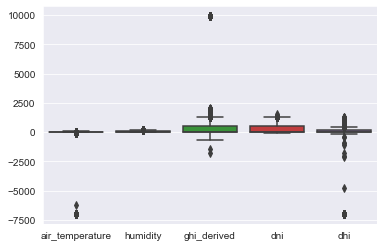

In [11]:
plt.figure()
data = df[['air_temperature', 'humidity', 'ghi_derived', 'dni','dhi']]
sns.boxplot(data =  data);

We can see there's outliers, and also data that doesn't make since.\
For example, temperature below 5000, also GHI and DHI above 5000.\
We will create a function, to treat these outliers by turning them to NaN for forward filling.\
Since time is a critical here and we can't afford to delete rows if we can treat them.

In [12]:
def outlier(feature):
    # Turning Oulier into NaN
    for i in [feature]:
        q75,q25 = np.percentile(df.loc[:,i],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[i] < min,i] = np.nan
        df.loc[df[i] > max,i] = np.nan

In [13]:
# Applying the function to treat outliers
outlier('air_temperature')
outlier('humidity')
outlier('dni')
outlier('dhi')
outlier('ghi_derived')

In [14]:
# Forward Filling for the NaNs, along with that is GHI and DNI and DHI as well.
df = df.apply(lambda x: x.fillna(method='ffill'))

In [15]:
# Setting values below 0 to 0
# Because as we explained earlier, below 0 is the way of the sensor when there's no GHI.. etc.
x = df['ghi_derived'] < 1
df.loc[x, 'ghi_derived'] = 0

x = df['dni'] < 1
df.loc[x, 'dni'] = 0

x = df['dhi'] < 1
df.loc[x, 'dhi'] = 0


# Researching GHI yields that 1000 is the approx maximum for GHI and 800 for DNI
mask = df['ghi_derived'] > 1000
df.loc[mask, 'ghi_derived'] = 1000

mask = df['dni'] > 1000
df.loc[mask, 'dni'] = 1000

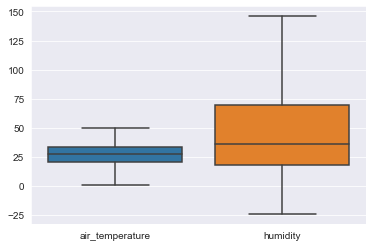

In [16]:
# That's more like it!
data = df[['air_temperature', 'humidity']]
sns.boxplot(data =  data);

There's humidity level that are over 100, and that's impossible for relative humidity.\
So we will turn anything above 99% to NaN, then fill them with the mean.\
But, we have to take the location into consideration here, because it varies significantly.\
We have to group by location and take the mean.

In [17]:
# Getting the average humidity per city
humid = df.groupby('location')['humidity'].mean()
humid

location
Abha              61.776735
Al-Ahsa           29.643331
Al-Jouf           42.429339
Al-Madinah        29.831912
Al-Qaisumah       39.093781
Gizan             80.186809
Jeddah            69.739961
Qassim            32.525724
Sharurah          26.317930
Wadi_Aldwasser    28.061680
Name: humidity, dtype: float64

In [18]:
# Filling the humidity that above 99 with the average humidity per city

mask = (df['location'] == 'Abha') & (df['humidity'] > 99)
df.loc[mask, 'humidity'] = humid[0]
#
mask = (df['location'] == 'Al-Ahsa') & (df['humidity'] > 99)
df.loc[mask, 'humidity'] = humid[1]
#
mask = (df['location'] == 'Al-Jouf') & (df['humidity'] > 99)
df.loc[mask, 'humidity'] = humid[2]
#
mask = (df['location'] == 'Al-Madinah') & (df['humidity'] > 99)
df.loc[mask, 'humidity'] = humid[3]
#
mask = (df['location'] == 'Al-Qaisumah') & (df['humidity'] > 99)
df.loc[mask, 'humidity'] = humid[4]
#
mask = (df['location'] == 'Gizan') & (df['humidity'] > 99)
df.loc[mask, 'humidity'] = humid[5]
#
mask = (df['location'] == 'Jeddah') & (df['humidity'] > 99)
df.loc[mask, 'humidity'] = humid[6]
#
mask = (df['location'] == 'Qassim') & (df['humidity'] > 99)
df.loc[mask, 'humidity'] = humid[7]
#
mask = (df['location'] == 'Sharurah') & (df['humidity'] > 99)
df.loc[mask, 'humidity'] = humid[8]
#
mask = (df['location'] == 'Wadi_Aldwasser') & (df['humidity'] > 99)
df.loc[mask, 'humidity'] = humid[9]



# 1500 records of below 0 humidity are set to 0.
mask = (df['humidity'] < 0)
df.loc[mask, 'humidity'] = 0

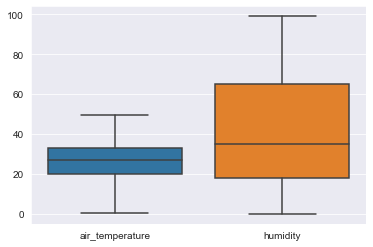

In [19]:
# Viola!
data = df[['air_temperature', 'humidity']]
sns.boxplot(data =  data);

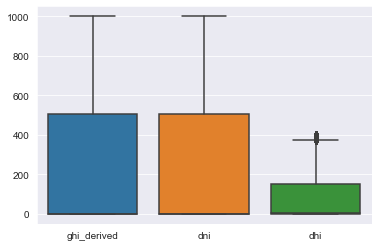

In [20]:
data = df[['ghi_derived', 'dni', 'dhi']]
sns.boxplot(data =  data);

We noticed the DHI might have some outliers, but they are still way below the max.\
Also, there is quite a number of records for it. We can't see the median because we have to take\
That half of the data is 0, since we have night records too. let's see how it looks without the 0.

In [21]:
ghi_box = df[df['ghi_derived'] > 0]

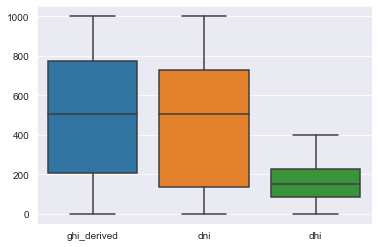

In [22]:
data = ghi_box[['ghi_derived', 'dni', 'dhi']]
sns.boxplot(data =  data);

In [23]:
df[['ghi_derived', 'dni','dhi']].describe()

,ghi_derived,dni,dhi
count,3.106166e+06,3.106166e+06,3.106166e+06
mean,2.483363e+02,2.282121e+02,8.058051e+01
std,3.323020e+02,3.174492e+02,1.052498e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.780000e+00,0.000000e+00,2.170000e+00
75%,5.070600e+02,5.067000e+02,1.498000e+02
max,1.000000e+03,1.000000e+03,3.967000e+02


Lastly, we are dropping the columns that will not serve us in the EDA part or ML.

In [24]:
# Dropping Unnecessary columns
df.drop(['ghi_zenith','SERI_QC_ghi_zenith','SERI_QC_ghi_derived','SERI_QC_dni','SERI_QC_dhi','SERI_QC_air_temperature','SERI_QC_humidity'],axis=1,inplace=True)

In [25]:
#df.reset_index(inplace=True)
#df['time'] = df['date'].dt.date
#df['x'] = df['date'].dt.time
#df.rename(columns={'date':'datetime', 'time':'date', 'x':'time'}, inplace=True)
#df.to_csv('GHI_dashboard_ready.csv', index=False)

# Exploratory Data Analysis

Our Target is the GHI, we will try to understand it better first before building any model.

In [26]:
df_eda = df[df['ghi_derived'] > 0]

In [27]:
#energy = pd.read_csv('Energy consumption dataset.csv')

In [28]:
#energy_r = energy[energy['Region'] != 'Total']

In [29]:
#plt.figure(figsize=(8, 6), dpi=72)
#sns.barplot(data=energy_r, x='Year', y='Total Energy Consumed', hue='Region');
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.savefig('Energy_consumption_region')

In [30]:
jouf = df[df['location']=='Al-Jouf']

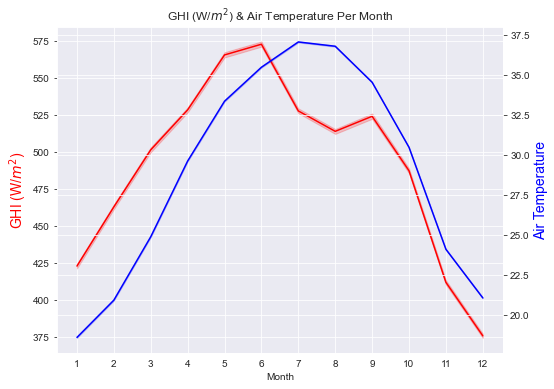

In [31]:
plt.figure(figsize=(8, 6), dpi=72)
ax1 = sns.lineplot(data = df_eda, x = df_eda.index.month, y = 'ghi_derived', color='r')
ax1.set(title='GHI (W/$m^2$) & Air Temperature Per Month', xlabel='Month', xticks =(range(1,13)))
ax2 = ax1.twinx()
ax2 = sns.lineplot(data = df_eda, x = df_eda.index.month, y = 'air_temperature', color='blue')
ax2.set(ylabel='Air Temperature')
ax1.set_ylabel('GHI (W/$m^2$)', color='r', fontsize=14)
ax2.set_ylabel('Air Temperature', color='b', fontsize=14);
#plt.savefig('ghi_temperature')

The relationship between GHI and Air Temperature is somewhat correlated.\
But it's worth mentioning that we can get high GHI values with relatively low temperature.

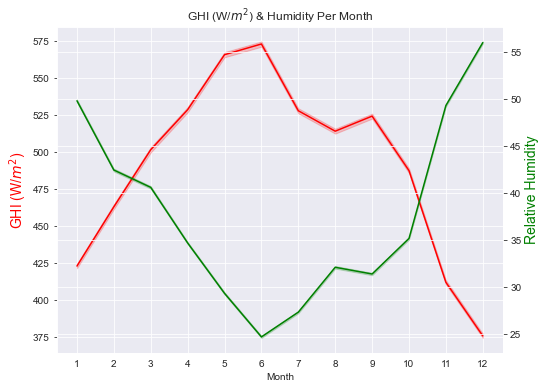

In [32]:
plt.figure(figsize=(8, 6), dpi=72)
ax1 = sns.lineplot(data = df_eda, x = df_eda.index.month, y = 'ghi_derived', color='r')
ax1.set(title='GHI (W/$m^2$) & Humidity Per Month', xlabel='Month', xticks =(range(1,13)))
ax2 = ax1.twinx()
ax2 = sns.lineplot(data = df_eda, x = df_eda.index.month, y = 'humidity', color='g')
ax2.set(ylabel='Humidity')
ax1.set_ylabel('GHI (W/$m^2$)', color='r', fontsize=14)
ax2.set_ylabel('Relative Humidity', color='g', fontsize=14);
#plt.savefig('ghi_humidity')

The correlation as it appears between the GHI and Humidity is negative.\
when there is high relative humidity (wet period), solar radiation will be low while in dry season, the solar radiation will be high, showing that relative humidity has effects on solar radiation of a place

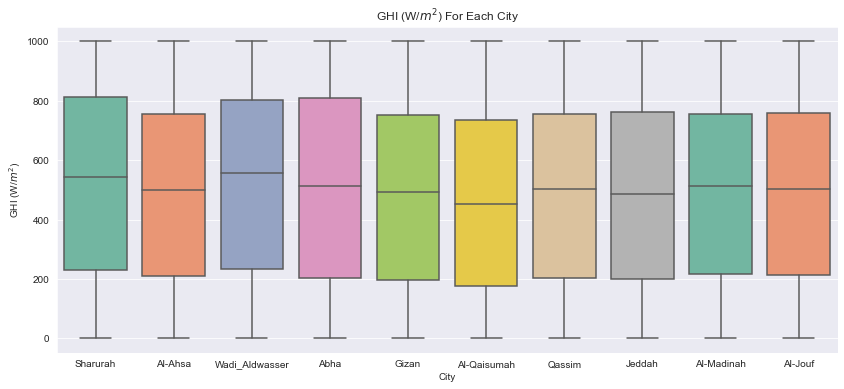

In [33]:
plt.figure(figsize=(14, 6), dpi=72)

ax = sns.boxplot(data = df_eda, x = 'location', y = 'ghi_derived', palette='Set2');
ax.set(title = 'GHI (W/$m^2$) For Each City', xlabel = 'City', ylabel = 'GHI (W/$m^2$)');
#plt.savefig('ghi_city.jpg')

There are not much difference between the locations for the GHI values.\
The median are about the same, but we see an edge for Sharurah and Abha mostly.

[Text(0.5, 1.0, 'Average GHI Per Location (Monthly)'),
 Text(0.5, 52.0, 'Month'),
 Text(70.0, 0.5, 'Location')]

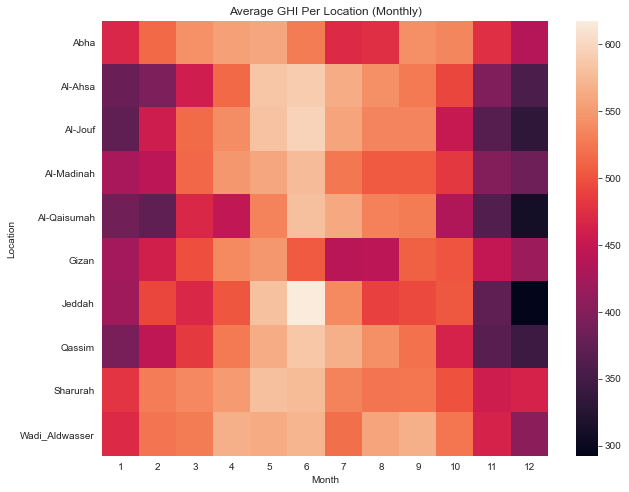

In [34]:
plt.figure(figsize=(10, 8), dpi=72)
table = pd.pivot_table(df_eda, values='ghi_derived', index='location', columns=df_eda.index.month)
ax = sns.heatmap(table);
ax.set(title='Average GHI Per Location (Monthly)', xlabel = 'Month', ylabel='Location')
#plt.savefig('heatmap')

The heatmap shows the average GHI for each location in each month.\
June is the optimal month for the average GHI, but there is some consistency over the months\
for Wadi Aldawasser, Sharurah.

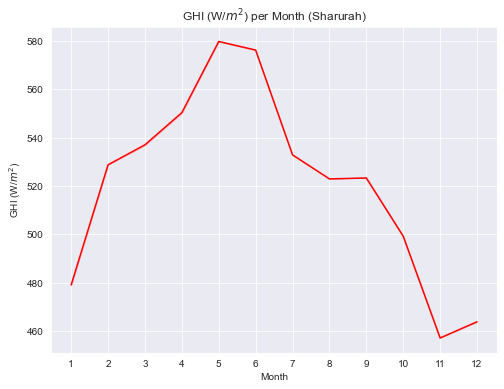

In [35]:
sharurah = df_eda[df_eda['location'] == 'Sharurah']
plt.figure(figsize=(8, 6), dpi=72)
ax1 = sns.lineplot(data = sharurah, x = sharurah.index.month, y = 'ghi_derived', color='r', ci=0)
ax1.set(title='GHI (W/$m^2$) per Month (Sharurah)',  xlabel='Month',ylabel='GHI (W/$m^2$)', xticks =(range(1,13)));
#plt.savefig('ghi_sharurah.jpg')

A closer look the graph confirms that June is the month with the most average GHI.\
We can also see that from February until September is the expected time to generate more solar energy.

In [36]:
may = sharurah.loc['May, 2000': 'May, 2002']

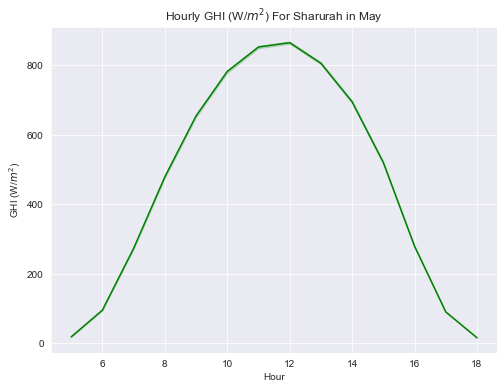

In [37]:
plt.figure(figsize=(8, 6), dpi=72)
ax1 = sns.lineplot(data = may, x = may.index.hour, y = 'ghi_derived', color='g')
ax1.set(title='Hourly GHI (W/$m^2$) For Sharurah in May',  xlabel='Hour',ylabel='GHI (W/$m^2$)');
#plt.savefig('sharurah_hourly')

An even deeper look into the hour of month May for Sharurah.\
starting from early 5:30AM until 6PM. So the prime time would be from 9AM, to 2:30PM.

# ML Modelling

In [38]:
# Finding the correlations
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ghi_derived,dni,dhi,air_temperature,humidity,latitude,longitude,elevation
ghi_derived,1.000000,0.879097,0.808905,0.386590,-0.241301,-0.012956,0.003539,0.013171
dni,0.879097,1.000000,0.594678,0.272561,-0.235275,0.021800,-0.008472,0.069518
dhi,0.808905,0.594678,1.000000,0.389499,-0.164850,-0.032492,0.013148,-0.056646
air_temperature,0.386590,0.272561,0.389499,1.000000,-0.425722,-0.091234,0.031831,-0.281828
humidity,-0.241301,-0.235275,-0.164850,-0.425722,1.000000,-0.303736,-0.327626,-0.089907
latitude,-0.012956,0.021800,-0.032492,-0.091234,-0.303736,1.000000,-0.062532,-0.201162
longitude,0.003539,-0.008472,0.013148,0.031831,-0.327626,-0.062532,1.000000,-0.052165
elevation,0.013171,0.069518,-0.056646,-0.281828,-0.089907,-0.201162,-0.052165,1.000000


Looking at the correlations above, it's a fairly low correlations to build something reliable.\
Air Temperature has a weak correlation, humidity has a weak negative correlation.\
<br>
As for DNI and DHI, we can't use them both. Because there's a multicollinearity. Also:\
Global Horizontal (GHI) = Direct Normal (DNI) X cos(θ) + Diffuse Horizontal (DHI)
<br>
So we have some trial and error to do, and lastly. Since we have datetime column, we can do a time series forecast.

### Baseline Model

In [39]:
# Taking a subset of the data frame for 'Abha'
abha = df[df['location'] == 'Abha']

In [40]:
# Splitting for the baseline model
X = abha[['air_temperature', 'humidity']]
y = abha['ghi_derived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [41]:
lr = RandomForestRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [42]:
print(f'R\u00b2: {lr.score(X_test, y_test)}')
print(f'MSE: {round(mean_squared_error(y_test, y_pred),2)}')
print(f'MAE: {round(mean_absolute_error(y_test, y_pred),2)}')

R²: 0.3338256235489834
MSE: 79110.2
MAE: 196.98


Taking an interval of 1-hour of the data (less computational power) for the whole 3 years.\
We chose Abha city earlier, so we will go with that.

In [43]:
# Specifying the date, month, interval of the data 
idx = pd.date_range(start = '2000-01-01', end = '2002-12-31', freq='1H')
abha_yearly = abha[abha.index.isin(idx)]

abha_yearly['ghi_derived'].value_counts()

0.00       12423
1000.00      771
479.76         3
809.52         3
24.26          3
           ...  
409.59         1
963.03         1
480.02         1
186.27         1
738.50         1
Name: ghi_derived, Length: 11078, dtype: int64

### Using The Target As The Predictor

Since we don't have strong or enough correlations to build the model with a reliable accuracy.\
We have to take the target as a predictor too. We have to shift the target by (-1) first.

In [44]:
# dependant and independant variables are the same. Just shifted the target -1
# To make the target the upcoming hour.
abha_yearly = abha_yearly[['ghi_derived']].copy()
abha_yearly['target'] = abha_yearly.ghi_derived.shift(-1)
abha_yearly.dropna(inplace=True)
abha_yearly.head(3)

,ghi_derived,target
date,,
2000-01-01 01:00:00,0.0,0.0
2000-01-01 02:00:00,0.0,0.0
2000-01-01 03:00:00,0.0,0.0


In [45]:
# Train, Test, Split

X = abha_yearly[['ghi_derived']]
y = abha_yearly['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#### Random Forest

In [46]:
rf_model = RandomForestRegressor(n_estimators=6, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=6, random_state=42)

In [47]:
y_pred = rf_model.predict(X_test)
rf_model.score(X_test, y_test)
print(f'\R\u00b2: {rf_model.score(X_test, y_test)}')
print(f'MSE: {round(mean_squared_error(y_test, y_pred),2)}')
print(f'MAE: {round(mean_absolute_error(y_test, y_pred),2)}')

\R²: 0.7541980277556251
MSE: 28835.89
MAE: 96.78


We see an improvement when we changed the approach, now we can predict an hour ahead.\
Let's see if we can push the model with selecting different parameters.

In [48]:
# Storing lists of different parameters.
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [49]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 10,
    cv = 5,
    verbose=2,
    random_state=42,
    n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [500, 510, 520, 530,
                                                         540, 551, 561, 571,
                                                         581, 591, 602, 612,
                                                         622, 632, 642, 653,
                                                         663, 673, 683, 693,
                                                         704, 714, 724, 734,
                                                         744, 755, 765, 775,
                                        

In [50]:
# Getting the best parameter to init the model with.
rf_df = pd.DataFrame(rf_random.cv_results_)
parameters=['param_n_estimators',
           'param_min_samples_split',
           'param_min_samples_leaf',
           'param_max_features',
           'param_max_depth',
           'param_bootstrap',
           'mean_test_score',
           'rank_test_score']

rf_df = rf_df[parameters]

rf_df.sort_values(by = ['rank_test_score']).head()

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
3,948,5,4,auto,None,True,0.806576,1
7,887,10,2,sqrt,None,True,0.803239,2
4,806,5,2,auto,None,True,0.791536,3
5,959,2,2,auto,None,True,0.789195,4
1,571,5,4,sqrt,None,False,0.774041,5


We converted the cv_results_ into a dataframe and sorted it by ranking. Just to make sure to pick the right ones.\
We see here, 2nd rank has 887 # of estimators compared to the first 948 (more computational power) with a sacrafice of 0.36\
Picking the first one and applying it the second model.

In [51]:
# initializing the second model of RF with the best params
rf_model2 = RandomForestRegressor(
    n_estimators=948,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='auto',
    max_depth=None,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_model2.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=5, n_estimators=948,
                      n_jobs=-1, random_state=42)

In [52]:
y_pred = rf_model2.predict(X_test)
rf_model2.score(X_test, y_test)
print(f'R\u00b2: {rf_model2.score(X_test, y_test)}')
print(f'MSE: {round(mean_squared_error(y_test, y_pred),2)}')
print(f'MAE: {round(mean_absolute_error(y_test, y_pred),2)}')

R²: 0.8059486077542244
MSE: 22764.85
MAE: 89.76


Another Improvement!\
One more for a supervised learning problem.\
Now with boosting regression.

#### XGBoost with Hyperparameter Tuning

In [53]:
xgbr = XGBRegressor()

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [10, 100]
         }

clf = GridSearchCV(
    estimator=xgbr, 
    param_grid=params,
    scoring='neg_mean_squared_error', 
    cv = 5,
    verbose=1
)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [54]:
clf_df = pd.DataFrame(clf.cv_results_)
parameters = ['param_max_depth', 'param_learning_rate', 'param_n_estimators', 'mean_test_score', 'rank_test_score']
clf_df = clf_df[parameters].sort_values(by = ['rank_test_score'])
clf_df.head()

,param_max_depth,param_learning_rate,param_n_estimators,mean_test_score,rank_test_score
7,3,0.05,100,-20215.364268,1
13,3,0.1,100,-20238.826784,2
9,6,0.05,100,-20358.625166,3
15,6,0.1,100,-20549.055787,4
11,10,0.05,100,-20986.641112,5


There's no multiple rank 1 here, so we will take the first one with the closest negative mean square to 0.\
which is the first one.

In [55]:
xgbr_model = XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators=100,
    max_depth = 3,
    learning_rate=0.05,
    random_state=42
)
xgbr_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_pred = xgbr_model.predict(X_test)
xgbr_model.score(X_test, y_test)
print(f'R\u00b2: {xgbr_model.score(X_test, y_test)}')
print(f'MSE: {round(mean_squared_error(y_test, y_pred),2)}')
print(f'MAE: {round(mean_absolute_error(y_test, y_pred),2)}')

R²: 0.8304850463223229
MSE: 19886.39
MAE: 88.03


Another Improvement here with Boosting, another way to solve this, is with Time Series models.\
So let's try that with ARMIA model, it stands for: Auto Regressive Integrated Moving Average

### Treating it as a Time Series Problem.

In [57]:
# Frequency 1-Hour, for 3 years.
idx = pd.date_range(start = '2000-01-01', end = '2001-12-31', freq='1H')
abha_yearly = abha[abha.index.isin(idx)]
abha_yearly = abha_yearly[['ghi_derived']].copy()

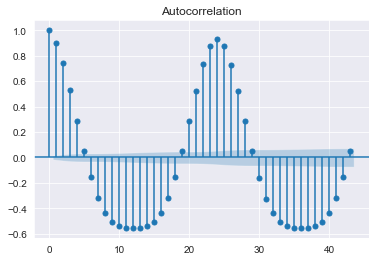

In [58]:
# The autocorrelation plot
plot_acf(abha_yearly);

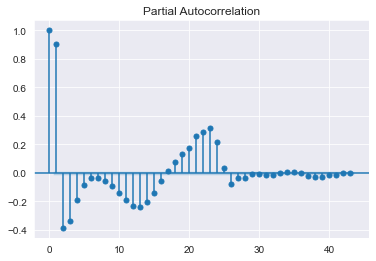

In [59]:
# Partial autocorrelation plot to find any trends.
plot_pacf(abha_yearly);

In [60]:
# Train, Test, Splot

train, test = train_test_split(abha_yearly, train_size=0.8, shuffle=False, random_state=42)

In [61]:
# No differncing needed.
ndiffs(abha_yearly['ghi_derived'], test='adf')

0

In [62]:
# Auto Regressive Integrated Moving Average
model = ARIMA(train, order=(2, 0, 6)) # order takes, p, d, q. In this order p:3, d:0, q:7
result = model.fit(disp=0)
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:            ghi_derived   No. Observations:                14015
Model:                     ARMA(2, 6)   Log Likelihood              -86801.624
Method:                       css-mle   S.D. of innovations            118.427
Date:                Fri, 14 Jan 2022   AIC                         173623.248
Time:                        11:45:28   BIC                         173698.727
Sample:                    01-01-2000   HQIC                        173648.375
                         - 08-06-2001                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               260.7025      2.551    102.197      0.000     255.703     265.702
ar.L1.ghi_derived     1.9302      0.001   2397.623      0.000       1.929       1.932
ar.L2.ghi_derived    -0.

In [63]:
# How many steps into the future to forecast.
step = 48

# fc = forcasted, se = Std Error, conf = confidence range (upper limit, lower limit)
fc, se, conf = result.forecast(step)


# Making a series for each one of those for plotting.
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)


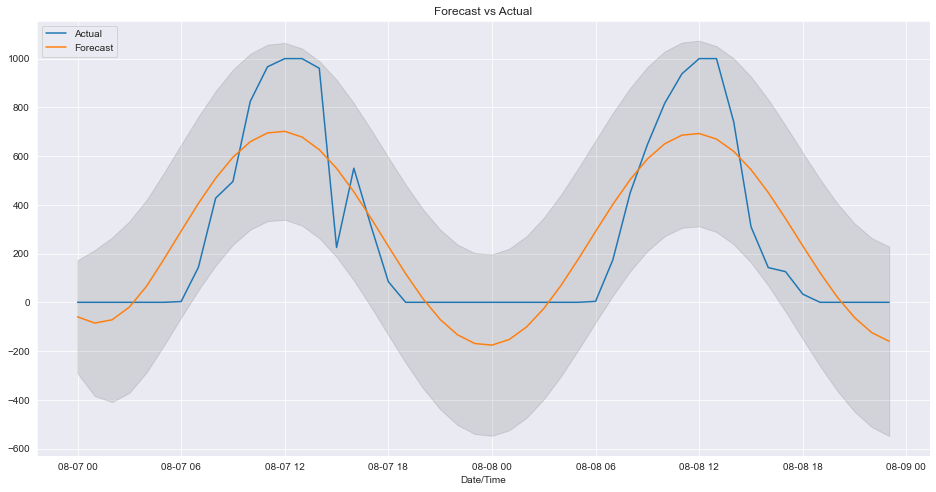

In [64]:
# Plotting Actual vs Forecasted

plt.figure(figsize=(16, 8), dpi=72)
plt.plot(test[:step], label='actual')
plt.plot(fc, label='forecast')
plt.fill_between(lower.index, lower, upper, color='k', alpha=0.1)
plt.title('Forecast vs Actual')
plt.xlabel('Date/Time')
plt.legend(['Actual', 'Forecast'], loc='upper left');
plt.savefig('arima_result')